####  Rasmni yuklab olish uchun kerakli modullarni chaqiramiz

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

#### Test qilish uchun rasmlarni yuklab olamiz 

In [2]:
images = np.array([np.array(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)) for file in glob.glob('rasmlar/*.png')])

#### Rasmlarni gray holatda chiqaramiz 

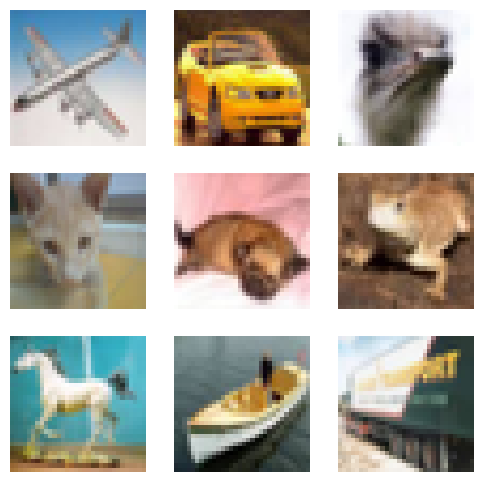

In [3]:
fig, axs = plt.subplots(3, 3, figsize=(6,6))

for i, ax in enumerate(axs.flatten()):
    if i < len(images):
        ax.imshow(images[i])
    ax.axis('off')
plt.show()

#### Rasmlar matritsalari qiymatlarini float32 formatga keltiramiz, normallashtiramiz va shape ni modelga berish uchun moslashtiramiz

In [4]:
images = images.astype('float32')/255
images = images.reshape(9,32,32,3)

#### Rasmlarni qiymatlarini bashorat qilish uchun Modelni yuklab olamiz

In [5]:
import tensorflow as tf
model = tf.keras.models.load_model("model.h5")

#### Rasmlarni predict qilamiz

In [6]:
one_hot_encoding_label = model.predict(images)
one_hot_encoding_label.round(6)

1/1 [==============================] - 0s 103ms/step


array([[8.84479e-01, 0.00000e+00, 1.15400e-01, 1.14000e-04, 0.00000e+00,
        3.00000e-06, 4.00000e-06, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.60000e-05, 9.99844e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e-06, 1.38000e-04],
       [6.64700e-03, 1.00000e-06, 9.87216e-01, 3.30600e-03, 4.30000e-05,
        7.72000e-04, 6.90000e-05, 2.00000e-06, 1.93300e-03, 1.30000e-05],
       [1.38300e-03, 1.82000e-04, 2.94290e-02, 3.48643e-01, 3.71013e-01,
        1.09109e-01, 1.16000e-04, 1.40014e-01, 3.20000e-05, 7.80000e-05],
       [1.60000e-05, 3.00000e-06, 2.73000e-04, 7.00397e-01, 2.27000e-04,
        2.92396e-01, 5.33700e-03, 1.34100e-03, 1.00000e-06, 8.00000e-06],
       [1.08980e-02, 6.67000e-04, 8.80330e-02, 2.91414e-01, 9.18680e-02,
        1.89650e-02, 4.92971e-01, 3.09900e-03, 6.10000e-05, 2.02400e-03],
       [1.43600e-03, 1.26000e-04, 8.67000e-03, 5.54900e-03, 1.29538e-01,
        1.08630e-02, 1.74000e-04, 8.40291e-01

#### Natija sifatida olingan one hot encoding labellaridan natijani olamiz 

In [8]:
target = []
for i in range(len(images)):
    target.append(np.argmax(one_hot_encoding_label[i]))

classlar = ["samolyot","avtomobil","qush","mushuk","kiyik","it","qurbaqa","ot","kema","yuk mashinasi"]
for i in target:
    print(classlar[i])

samolyot
avtomobil
qush
kiyik
mushuk
qurbaqa
ot
kema
yuk mashinasi
